In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import keras
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report,accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
import joblib
from IPython.display import Image  
from sklearn.tree import plot_tree
#from dtreeviz.trees import dtreeviz

import pydotplus
#Read the csv, drop index column
df=pd.read_csv("transaction_dataset.csv")
df=df.iloc[:,2:]

# buscamos columnas con 0 varianza (NO SIRVEN)
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

# Quitamos columnas con varianza=0, no sirven para entrenar el modelo

df.drop(df.var()[no_var].index, axis = 1, inplace = True)

#quitamos " "  del nombre de columnas que empiezan con " "
df.columns = df.columns.str.replace(' ', '_')
#si empieza con "_" lo quitamos
df.columns = df.columns.str.replace('^_', '')

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64




C:\Users\docam\AppData\Local\Temp\ipykernel_15032\3720905652.py:33: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\docam\AppData\Local\Temp\ipykernel_15032\3720905652.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\docam\AppData\Local\Temp\ipykernel_15032\3720905652.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\docam\AppData\Local\Temp\ipykernel_15032\3720905652.py:44: FutureWarning: The default value of regex will change from True to False in a future v

In [171]:
pd.set_option('display.max_columns', None)
df.info()

#df.columns = df.columns.str.replace(' ', '_')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 42 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9841 non-null   object 
 1   FLAG                                                  9841 non-null   int64  
 2   Avg_min_between_sent_tnx                              9841 non-null   float64
 3   Avg_min_between_received_tnx                          9841 non-null   float64
 4   Time_Diff_between_first_and_last_(Mins)               9841 non-null   float64
 5   Sent_tnx                                              9841 non-null   int64  
 6   Received_Tnx                                          9841 non-null   int64  
 7   Number_of_Created_Contracts                           9841 non-null   int64  
 8   Unique_Received_From_Addresses                        9841

Turn object variables into 'category' dtype for more computation efficiency


In [172]:


categories = df.select_dtypes('O').columns.astype('category')
df[categories]
print(len(df.columns))
for i in df.columns:
    print(f'La columna --{i}-- tiene --{len(df[i].value_counts())}-- valores únicos')

df.describe()

print((df.FLAG==1).value_counts())

42
La columna --Address-- tiene --9816-- valores únicos
La columna --FLAG-- tiene --2-- valores únicos
La columna --Avg_min_between_sent_tnx-- tiene --5013-- valores únicos
La columna --Avg_min_between_received_tnx-- tiene --6223-- valores únicos
La columna --Time_Diff_between_first_and_last_(Mins)-- tiene --7810-- valores únicos
La columna --Sent_tnx-- tiene --641-- valores únicos
La columna --Received_Tnx-- tiene --727-- valores únicos
La columna --Number_of_Created_Contracts-- tiene --20-- valores únicos
La columna --Unique_Received_From_Addresses-- tiene --256-- valores únicos
La columna --Unique_Sent_To_Addresses-- tiene --258-- valores únicos
La columna --min_value_received-- tiene --4589-- valores únicos
La columna --max_value_received_-- tiene --6302-- valores únicos
La columna --avg_val_received-- tiene --6767-- valores únicos
La columna --min_val_sent-- tiene --4719-- valores únicos
La columna --max_val_sent-- tiene --6647-- valores únicos
La columna --avg_val_sent-- tiene --

Inspect numerical columns

Central tendency

In [173]:
print(len(df.columns))
for x in range(42):
    print(x, df.columns[x])

42
0 Address
1 FLAG
2 Avg_min_between_sent_tnx
3 Avg_min_between_received_tnx
4 Time_Diff_between_first_and_last_(Mins)
5 Sent_tnx
6 Received_Tnx
7 Number_of_Created_Contracts
8 Unique_Received_From_Addresses
9 Unique_Sent_To_Addresses
10 min_value_received
11 max_value_received_
12 avg_val_received
13 min_val_sent
14 max_val_sent
15 avg_val_sent
16 min_value_sent_to_contract
17 max_val_sent_to_contract
18 avg_value_sent_to_contract
19 total_transactions_(including_tnx_to_create_contract
20 total_Ether_sent
21 total_ether_received
22 total_ether_sent_contracts
23 total_ether_balance
24 Total_ERC20_tnxs
25 ERC20_total_Ether_received
26 ERC20_total_ether_sent
27 ERC20_total_Ether_sent_contract
28 ERC20_uniq_sent_addr
29 ERC20_uniq_rec_addr
30 ERC20_uniq_sent_addr.1
31 ERC20_uniq_rec_contract_addr
32 ERC20_min_val_rec
33 ERC20_max_val_rec
34 ERC20_avg_val_rec
35 ERC20_min_val_sent
36 ERC20_max_val_sent
37 ERC20_avg_val_sent
38 ERC20_uniq_sent_token_name
39 ERC20_uniq_rec_token_name
40 ERC

0    7662
1    2179
Name: FLAG, dtype: int64


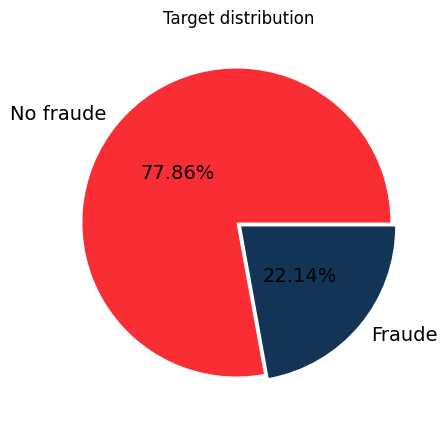

In [174]:
# Distribución de fraude/ no fraude
print(df['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[7,5])
labels = ['No fraude', 'Fraude']
colors = ['#f92e35', '#123456']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

NÚMERO TOTAL DE TRANSACCIONES RECIBIDAS O ENVIADAS A DISTINTAS CUENTAS

In [175]:
#SENT TO UNIQUE ADDRESSES

##Change ERC20_uniq_sent_addr to type integer
df["ERC20_uniq_sent_addr"] = df["ERC20_uniq_sent_addr"].fillna(0).astype(int)

# sumar las columnas y agregar la columna resultante al dataset
df["Total_unique_sent_to_addresses"] = df["Unique_Sent_To_Addresses"] + df["ERC20_uniq_sent_addr"]
print(df["Total_unique_sent_to_addresses"])


#RECEIVED FROM UNIQUE ADDRESSES
#crea una columna que sume la columna 8 y la 29
#Change ERC20_uniq_rec_addr to type integer
df["ERC20_uniq_rec_addr"] = df["ERC20_uniq_rec_addr"].fillna(0).astype(int)
df["Total_unique_recieved"] = df["Unique_Received_From_Addresses"] + df["ERC20_uniq_rec_addr"]
#elimina las columnas 8 y 29
df.drop(["Unique_Received_From_Addresses", "ERC20_uniq_rec_addr"], axis=1, inplace=True)
print(df["Total_unique_recieved"])

0       148
1        15
2         2
3        15
4        23
       ... 
9836      4
9837      0
9838     44
9839      0
9840      5
Name: Total_unique_sent_to_addresses, Length: 9841, dtype: int64
0       94
1       10
2       17
3       18
4       30
        ..
9836    13
9837     1
9838    36
9839     1
9840    38
Name: Total_unique_recieved, Length: 9841, dtype: int64


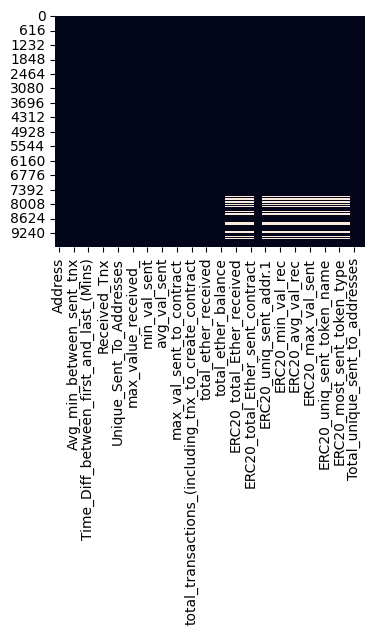

In [176]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(4,3))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

(9012, 39)


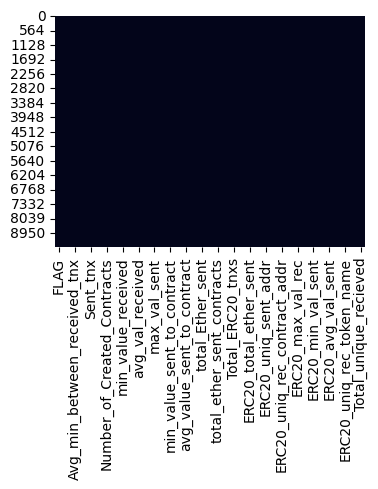

In [177]:
# Eliminamos duplicados
df.drop(df[categories], axis=1, inplace=True)
# drop missings values
df.dropna(inplace=True)

# Visualize missings pattern of the dataframe
print(df.shape)
plt.figure(figsize=(4,3))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

-------VARIANZAS----------
FLAG                                                    1.273743e-01
Avg_min_between_sent_tnx                                4.900880e+08
Avg_min_between_received_tnx                            5.609860e+08
Time_Diff_between_first_and_last_(Mins)                 1.098688e+11
Sent_tnx                                                6.248215e+05
Received_Tnx                                            9.631088e+05
Number_of_Created_Contracts                             2.184618e+04
Unique_Sent_To_Addresses                                7.594203e+04
min_value_received                                      1.130904e+05
max_value_received_                                     1.847689e+08
avg_val_received                                        9.085309e+06
min_val_sent                                            2.097398e+04
max_val_sent                                            4.797736e+07
avg_val_sent                                            6.181331e+04
min_val

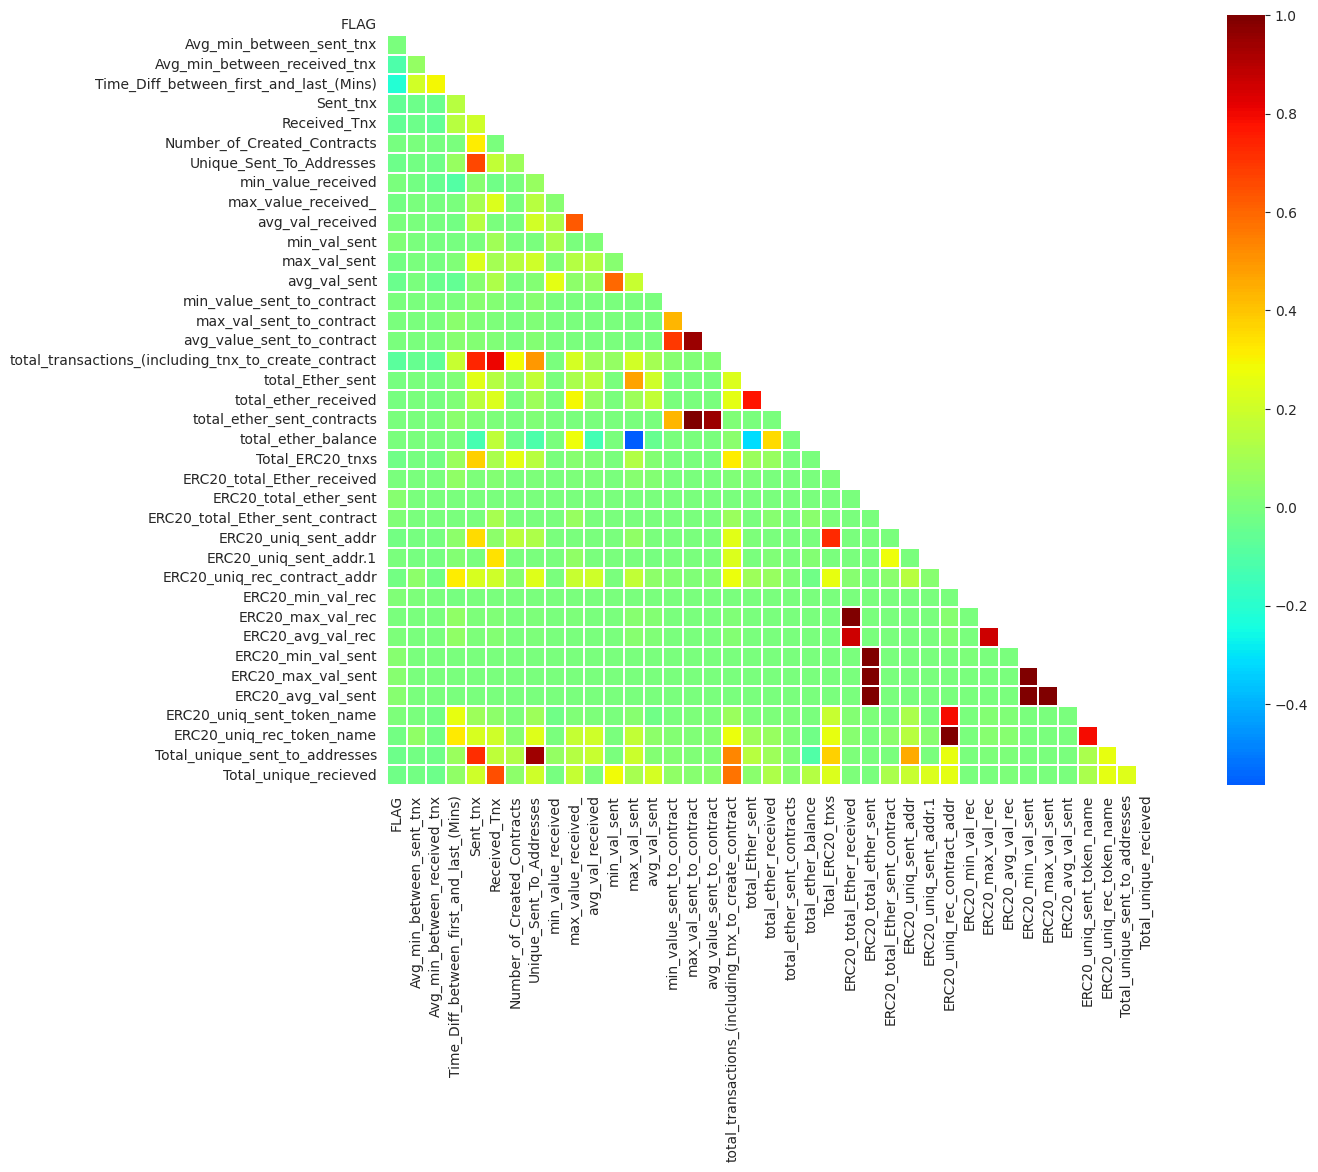

In [178]:

print("-------VARIANZAS----------")
print(df.var())
print(df.shape)

print("NUMBER OF COLUMNS:   ",len(df.columns))
corr = df.corr()
print ("CORRELATION VALUES")
#print(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='jet', linewidths=0.1, center=0, square=True)

Number of columns dropped 22
NUMBER OF COLUMNS:    18


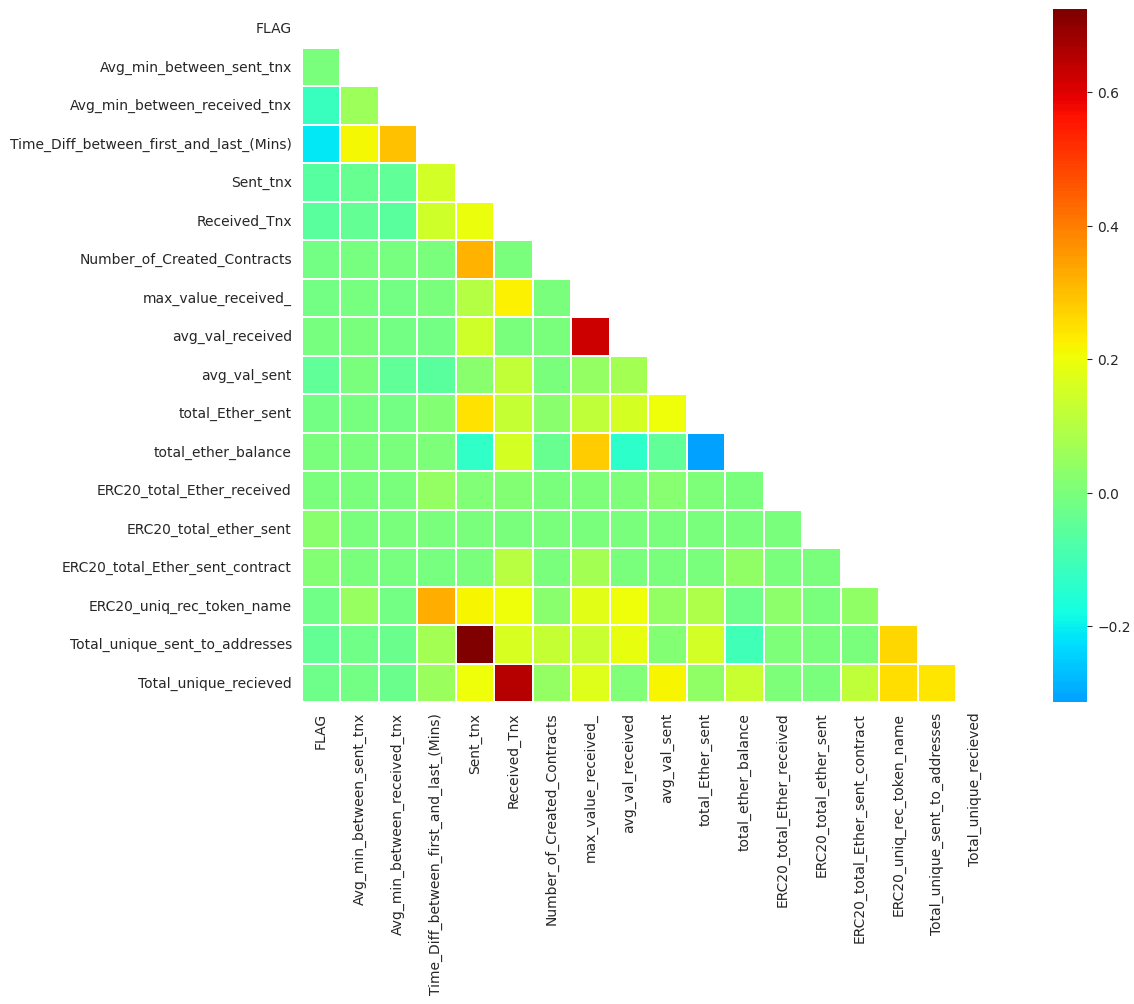

In [179]:
drop = [
'total_transactions_(including_tnx_to_create_contract',
'total_ether_sent_contracts',
'max_val_sent_to_contract',
'ERC20_avg_val_rec',
'ERC20_avg_val_rec',
'ERC20_max_val_rec',
'ERC20_min_val_rec',
'ERC20_uniq_rec_contract_addr',
'max_val_sent',
'ERC20_avg_val_sent',
'ERC20_min_val_sent',
'min_value_sent_to_contract',
'avg_value_sent_to_contract',
'ERC20_uniq_sent_addr.1',
'ERC20_max_val_sent',
'Total_ERC20_tnxs',
'total_ether_received',
'ERC20_uniq_sent_token_name',
'min_value_received',
'min_val_sent',
'Unique_Sent_To_Addresses',
'ERC20_uniq_sent_addr'

]
print("Number of columns dropped", len(drop))
df.drop(drop, axis=1, inplace=True)
corr = df.corr()
print("NUMBER OF COLUMNS:   ",len(df.columns))


#print(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(15,9))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='jet', linewidths=0.1, center=0, square=True)

18 Index(['FLAG', 'Avg_min_between_sent_tnx', 'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last_(Mins)', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts', 'max_value_received_',
       'avg_val_received', 'avg_val_sent', 'total_Ether_sent',
       'total_ether_balance', 'ERC20_total_Ether_received',
       'ERC20_total_ether_sent', 'ERC20_total_Ether_sent_contract',
       'ERC20_uniq_rec_token_name', 'Total_unique_sent_to_addresses',
       'Total_unique_recieved'],
      dtype='object')


C:\Users\docam\AppData\Local\Temp\ipykernel_15032\3094860064.py:10: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


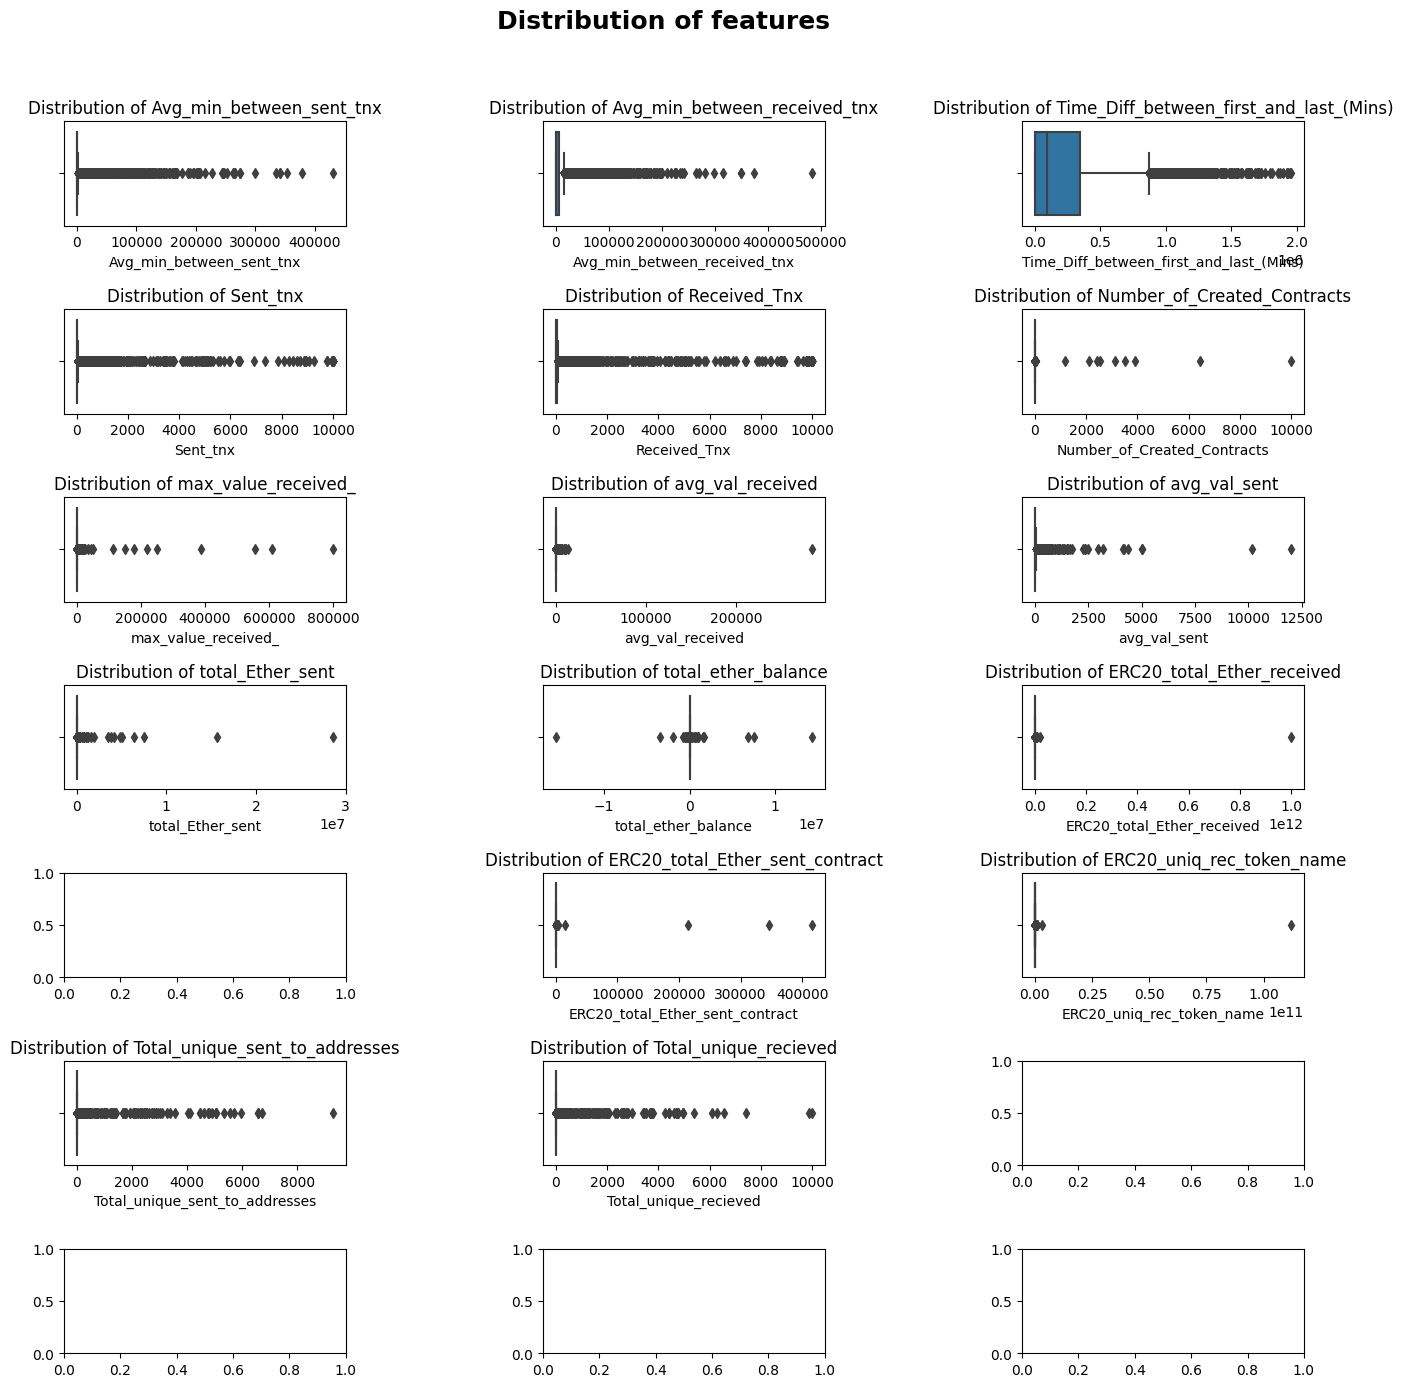

In [180]:
columns = df.columns
print(len(columns),columns)
# Muestra boxplots con las distribuciones   MAL POR CAMBIO DE COLUMNAS
b=1
#Quita valores duplicados
df[df.duplicated()== True]
df.drop_duplicates(inplace = True)

fig, axes = plt.subplots(7, 3, figsize=(16, 16), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')
  
ax = sns.boxplot(ax = axes[0,0], data=df, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.boxplot(ax = axes[3,1], data=df, x=columns[11])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df, x=columns[12])
ax11.set_title(f'Distribution of {columns[12]}')
 
ax12 = sns.boxplot(ax = axes[4,2], data=df, x=columns[13])
ax12.set_title(f'Distribution of {columns[13]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=df, x=columns[14])
ax13.set_title(f'Distribution of {columns[14]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=df, x=columns[15])
ax14.set_title(f'Distribution of {columns[15]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=df, x=columns[16])
ax15.set_title(f'Distribution of {columns[16]}')
 
ax16 = sns.boxplot(ax = axes[5,1], data=df, x=columns[17])
ax16.set_title(f'Distribution of {columns[17]}')

plt.show()

DISCRETIZACION 1ª COLUMNA: Avg_min_between_sent_tnx

In [181]:
#Estadisticas de la primera columna
df[columns[1]].describe()

count      8518.000000
mean       5679.527566
std       22703.912949
min           0.000000
25%           0.000000
50%          22.195000
75%        1078.910000
max      430287.670000
Name: Avg_min_between_sent_tnx, dtype: float64

8518
CERO        2668
NORMAL      1397
POCO        1266
ALTO        1239
MUY POCO    1029
MUY ALTO     808
ALTISIMO     111
Name: Avg_min_between_sent_tnx, dtype: int64
8518


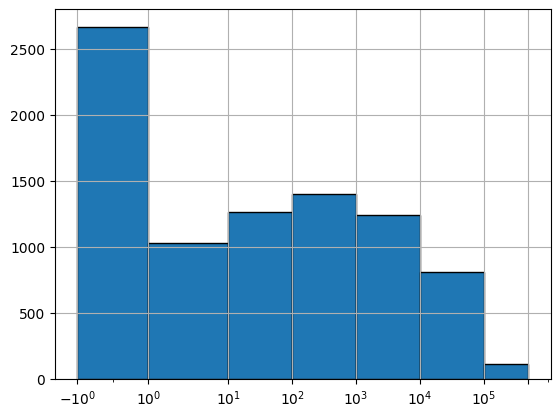

In [182]:
#Estadisticas de la primera columna
df[columns[1]].describe()
print(df[columns[1]].value_counts().sum())
#dividelo en bins
bins=[-1,1,10,100,1000,10000,100000,500000]
plt.xscale('symlog')
plt.xticks(bins)
df[columns[1]].hist(bins=bins,  align='mid',edgecolor='black')
#discretiza los valores de la columna en, los iguales a 0 y en ,10,50,100,1000,10000,100000,500000
df[columns[1]] = pd.cut(df[columns[1]], bins=bins, labels=["CERO","MUY POCO","POCO","NORMAL","ALTO","MUY ALTO","ALTISIMO"])
print(df[columns[1]].value_counts())
print(df[columns[1]].value_counts().sum())


Discretización 2ª columna: Avg_min_between_received_tnx

8518
8518
ALTO        2712
CERO        2396
MUY ALTO    1473
NORMAL       963
MINIMO       501
POCO         342
ALTISIMO     131
Name: Avg_min_between_received_tnx, dtype: int64


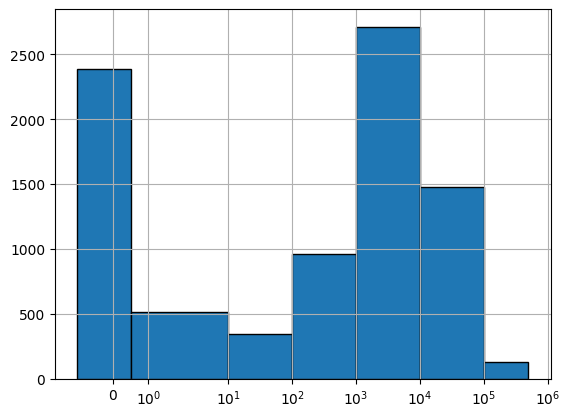

In [183]:
#Estadisticas de la primera columna
print(df[columns[2]].value_counts().sum())
df[columns[2]].describe()
#dividelo en bins
bins=[-1,0.5,10,100,1000,10000,100000,500000]
plt.xscale('symlog')
df[columns[2]].hist(bins=bins, align='mid',edgecolor='black')
#discretiza los valores de la columna en, los iguales a 0 y en ,10,50,100,1000,10000,100000,500000
df[columns[2]] = pd.cut(df[columns[2]], bins=bins, labels=["CERO","MINIMO","POCO","NORMAL","ALTO","MUY ALTO","ALTISIMO"])
print(df[columns[2]].value_counts().sum())
print(df[columns[2]].value_counts())

Discretización 3ª columna: Time_Diff_between_first_and_last_(Mins)

In [184]:
#Estadisticas de la 3ª columna
df[columns[3]].describe()

count    8.518000e+03
mean     2.479922e+05
std      3.356766e+05
min      0.000000e+00
25%      3.262500e+02
50%      9.223069e+04
75%      3.477539e+05
max      1.954861e+06
Name: Time_Diff_between_first_and_last_(Mins), dtype: float64

8518
8518
ALTISIMO        3815
MUY ALTO        1272
NORMAL          1101
POCO             855
MUY POCO         503
ALTO             480
MUY ALTISIMO     396
CERO              96
Name: Time_Diff_between_first_and_last_(Mins), dtype: int64


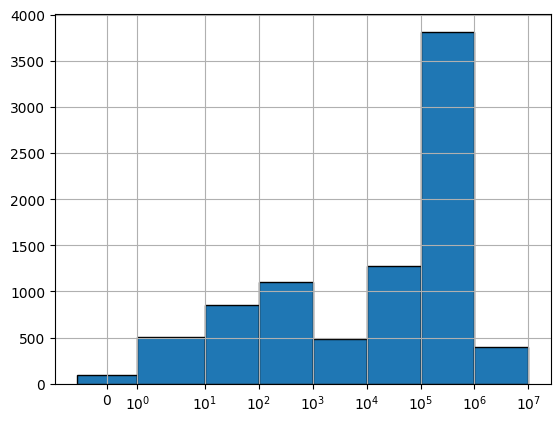

In [185]:

print(df[columns[3]].value_counts().sum())

bins=[-1,1,10,100,1000,10000,100000,1000000,10000000]
plt.xscale('symlog')
#muestra un histograma
df[columns[3]].hist(bins=bins, align='mid',edgecolor='black')
#discretiza los valores de la columna en, los iguales a 0,1,10,100,1000,10000,100000,1000000,10000000
df[columns[3]] = pd.cut(df[columns[3]], bins=bins, labels=["CERO","MUY POCO","POCO","NORMAL","ALTO","MUY ALTO","ALTISIMO","MUY ALTISIMO"])
print(df[columns[3]].value_counts().sum())
print(df[columns[3]].value_counts())

Discretización 4ª columna: Sent_tnx

In [186]:
#estadistica 4ta columna
df[columns[4]].describe()

count     8518.000000
mean       133.653322
std        812.453741
min          0.000000
25%          1.000000
50%          3.000000
75%         15.000000
max      10000.000000
Name: Sent_tnx, dtype: float64

8518
8518
CERO         2626
DOS          1705
DIEZ         1165
UNO          1095
CIEN          693
CINCO         643
CINCUENTA     380
MIL           211
Name: Sent_tnx, dtype: int64


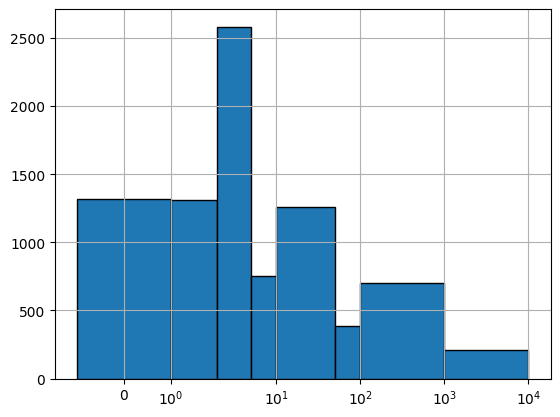

In [187]:
print(df[columns[4]].value_counts().sum())
bins=[-1,1,2,5,10, 50,100,1000,10000]
#muestra un histograma
plt.xscale('symlog')
df[columns[4]].hist(bins=bins, align='mid',edgecolor='black')
#discretiza los valores de la columna en, los iguales a 0,1,2,5,10, 50,100,1000,10000,100000
df[columns[4]] = pd.cut(df[columns[4]], bins=bins, labels=["CERO","UNO","DOS","CINCO","DIEZ","CINCUENTA","CIEN","MIL"])
print(df[columns[4]].value_counts().sum())
print(df[columns[4]].value_counts())

Discretización 5ª columna: Received_tnx

In [188]:
#estadistica Received_tnx
df[columns[5]].describe()

count     8518.000000
mean       188.001996
std       1008.493524
min          0.000000
25%          2.000000
50%          6.000000
75%         35.000000
max      10000.000000
Name: Received_Tnx, dtype: float64

8518
8518
CERO         1702
DIEZ         1601
MUY          1449
CIEN         1083
DOS          1017
CINCO         910
CINCUENTA     492
MIL           264
Name: Received_Tnx, dtype: int64


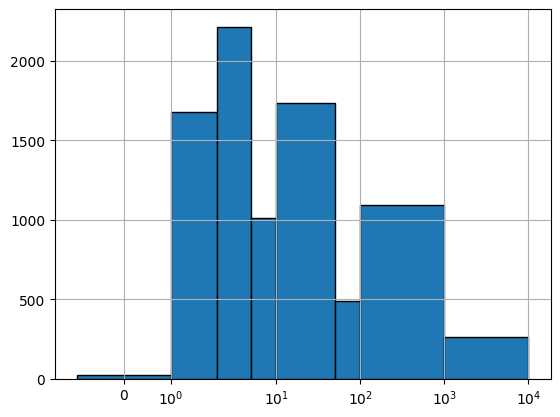

In [189]:
bins=[-1,1,2,5,10, 50,100,1000,10001]
print(df[columns[5]].value_counts().sum())
#muestra un histograma
plt.xscale('symlog')
df[columns[5]].hist(bins=bins, align='mid',edgecolor='black')
#discretiza los valores de la columna en, los iguales a 0,1,2,5,10, 50,100,1000,10000
df[columns[5]] = pd.cut(df[columns[5]], bins=bins, labels=["CERO","MUY","DOS","CINCO","DIEZ","CINCUENTA","CIEN","MIL"])
print(df[columns[5]].value_counts().sum())
print(df[columns[5]].value_counts())


Discretización 6ª columna: Number_of_Created_Contracts

8518
0       0.858065
1       0.137943
2       0.000939
3       0.000822
4       0.000352
5       0.000235
19      0.000117
3521    0.000117
9995    0.000117
2550    0.000117
2096    0.000117
6       0.000117
1180    0.000117
16      0.000117
41      0.000117
3900    0.000117
6453    0.000117
2404    0.000117
3128    0.000117
7       0.000117
Name: Number_of_Created_Contracts, dtype: float64
CERO          7309
MENOR A 20    1199
MAYOR A 20      10
Name: Number_of_Created_Contracts, dtype: int64
8518


<AxesSubplot:>

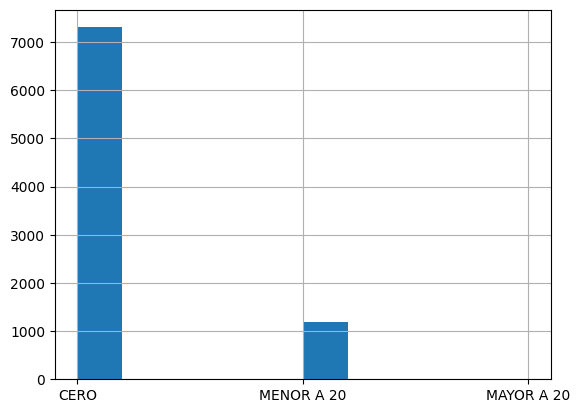

In [190]:
#Estadistica columna 6
df[columns[6]].describe()
print(df[columns[6]].value_counts().sum())
#porcentajes de valores de de la columna 6
print(df[columns[6]].value_counts(normalize=True))
#discretiza los valores segun si son 0, menores de 20 o mayores de 20
df[columns[6]] = pd.cut(df[columns[6]], bins=[-1,0,20,10000], labels=["CERO","MENOR A 20","MAYOR A 20"])
print(df[columns[6]].value_counts())
#draw an histogram
print(df[columns[6]].value_counts().sum())
df[columns[6]].hist()

Discretización 7ª columna: max_value_received_

In [191]:
#estadistica de la columna 7
df[columns[7]].describe()

count      8518.000000
mean        600.329740
std       13981.017998
min           0.000000
25%           1.093485
50%           8.493755
75%          72.644443
max      800000.000000
Name: max_value_received_, dtype: float64

UNO        2771
DIEZ       2370
CERO       1768
CIEN       1093
MIL         485
DIEZMIL      22
CIENMIL       9
Name: max_value_received_, dtype: int64


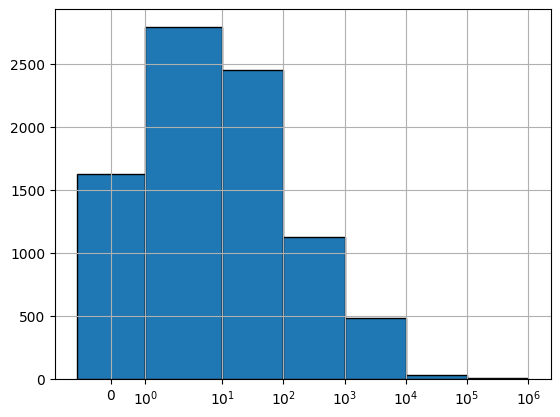

In [192]:
#create an histogram of column 7
bins=[-1,1,10,100,1000,10000,100000,1000000]
plt.xscale('symlog')
df[columns[7]].hist(bins=bins, align='mid',edgecolor='black')
#discretiza los valores de la columna en, los iguales a 0,1,10,100,1000,10000,100000,1000000
df[columns[7]] = pd.cut(df[columns[7]], bins=bins, labels=["CERO","UNO","DIEZ","CIEN","MIL","DIEZMIL","CIENMIL"])
print(df[columns[7]].value_counts())

Discretización 8ª columna: avg_val_received
QUITAR 10MIL Y 100MIL

In [193]:
#estadistica de la columna 8
df[columns[8]].describe()

count      8518.000000
mean        112.763018
std        3100.274288
min           0.000000
25%           0.597481
50%           2.244336
75%          26.478293
max      283618.831600
Name: avg_val_received, dtype: float64

UNO        2018
CERO       1915
DIEZ       1680
MEDIO      1200
CIEN        694
CINCO       634
MIL         375
DIEZMIL       2
Name: avg_val_received, dtype: int64


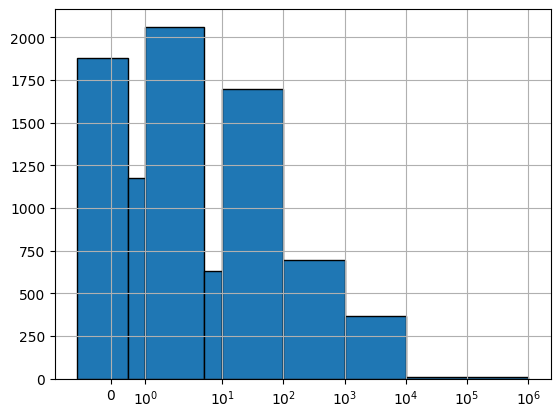

In [194]:
#create an histogram of column 8
bins=[-1,0.5,1,5,10,100,1000,10000,1000000]
plt.xscale('symlog')
df[columns[8]].hist(bins=bins, align='mid',edgecolor='black')
#discretiza los valores de la columna en, los iguales a 0,0.5,1,5,10,100,1000,10000,100000,1000000
df[columns[8]] = pd.cut(df[columns[8]], bins=bins, labels=["CERO","MEDIO","UNO","CINCO", "DIEZ","CIEN","MIL","DIEZMIL"])
print(df[columns[8]].value_counts())

Discretización 9ª columna: avg_val_sent

In [195]:
#ESTADISTICA DE LA COLUMNA 9
df[columns[9]].describe()


count     8518.000000
mean        49.912834
std        255.375056
min          0.000000
25%          0.199790
50%          1.996495
75%         25.249470
max      12000.000000
Name: avg_val_sent, dtype: float64

CINCO        1989
CERO         1824
UNO          1742
MEDIO        1643
CINCUENTA     793
CIEN          499
MIL            28
Name: avg_val_sent, dtype: int64


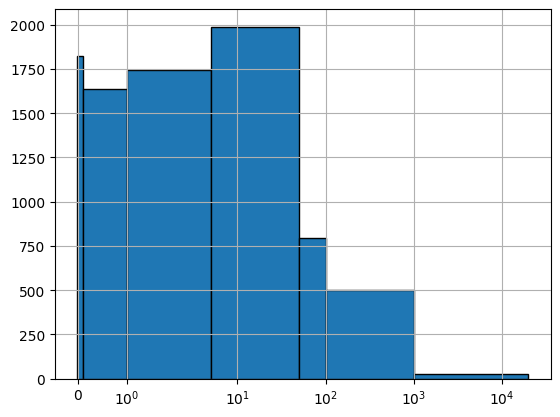

In [196]:
#create an histogram of column 9
bins=[-0.01,0.1,1,5,50,100,1000,20000]
plt.xscale('symlog')
df[columns[9]].hist(bins=bins, align='mid',edgecolor='black')
#discretiza los valores de la columna en, los iguales a 0,0.1,1,5,50,100,1000,20000
df[columns[9]] = pd.cut(df[columns[9]], bins=bins, labels=["CERO","MEDIO","UNO","CINCO", "CINCUENTA","CIEN","MIL"])
print(df[columns[9]].value_counts())

Discretización 9ª columna: total_Ether_sent

In [197]:
#estadistica de la columna 10
df[columns[10]].describe()

count    8.518000e+03
mean     1.173286e+04
std      3.851249e+05
min      0.000000e+00
25%      8.823070e-01
50%      1.950837e+01
75%      1.009990e+02
max      2.858096e+07
Name: total_Ether_sent, dtype: float64

8518
8518
CIEN      2215
CINCO     1680
CERO      1586
UNO       1478
MIL        841
MINIMO     673
MUCHO       45
Name: total_Ether_sent, dtype: int64


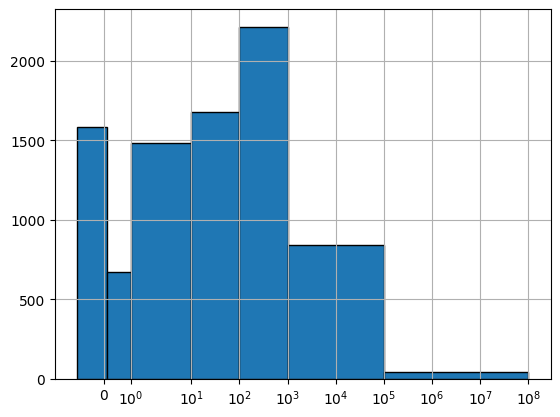

In [198]:
#create an histogram of column 10
bins=[-1,0.1,1,10,100,1000,100000,100000000]
print(df[columns[10]].value_counts().sum())
plt.xscale('symlog')
df[columns[10]].hist(bins=bins, align='mid',edgecolor='black')
#discretiza los valores de la columna en, los iguales a 0,0.1,1,2,5,100,1000,100000,10000000
df[columns[10]] = pd.cut(df[columns[10]], bins=bins, labels=["CERO","MINIMO","UNO","CINCO","CIEN","MIL","MUCHO",])
print(df[columns[10]].value_counts().sum())
print(df[columns[10]].value_counts())

Discretización 11ª columna: total_ether_balance
MAYORIA DE VALORES MUY CERCA DEL 0

In [199]:
#estadistica de la columna 11
df[columns[11]].describe()

count    8.518000e+03
mean     1.706554e+03
std      2.605740e+05
min     -1.560535e+07
25%      9.842180e-04
50%      2.205980e-03
75%      1.010835e-01
max      1.428864e+07
Name: total_ether_balance, dtype: float64

8518
8518
UNO               5383
MIL                843
MENOS UNO          573
CINCO              563
CIEN MIL           320
CERO               255
DIEZ               207
MAS                117
MENOS CIEN         113
CIEN                81
MENOS CIEN MIL      63
Name: total_ether_balance, dtype: int64


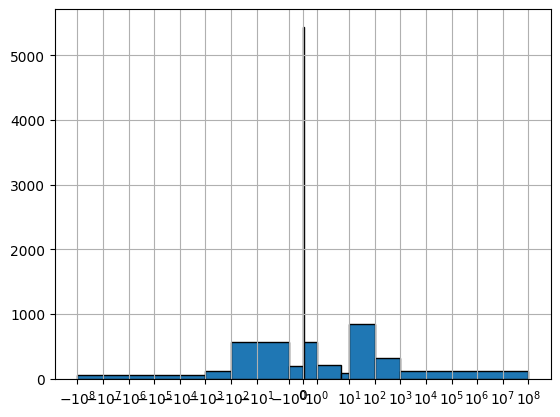

In [200]:
#create an histogram of column 11
print(df[columns[11]].value_counts().sum())
bins=[-100000000,-1000,-100,-1,0,0.1,1,5,10,100,1000,100000000]
plt.xscale('symlog')
df[columns[11]].hist(bins=bins, align='mid',edgecolor='black')
#discretiza los valores de la columnacon estos labels -10000000,-1000,-100,-1,0,0.1,1,5,10,100,1000,10000000
df[columns[11]] = pd.cut(df[columns[11]], bins=bins, labels=["MENOS CIEN MIL","MENOS CIEN","MENOS UNO","CERO","UNO","CINCO","DIEZ","CIEN","MIL","CIEN MIL","MAS"])
print(df[columns[11]].value_counts().sum())
print(df[columns[11]].value_counts())


Discretización 12ª columna: ERC20_total_Ether_received
MITAD DE LOS VALORES SON 0

In [201]:
#estadistica de la columna 12
df[columns[12]].describe()
#count how many rows equal to 0
#print(df[columns[12]].value_counts())


count    8.518000e+03
mean     1.371368e+08
std      1.083986e+10
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e-12
75%      1.133700e+02
max      1.000020e+12
Name: ERC20_total_Ether_received, dtype: float64

In [202]:
#CUANTOS VALORES IGUALES A 0 TIENEN EL VALOR FLAG COMO 1 Y CUANTOS COMO 0
print("FLAG",df[df[columns[12]]==0][columns[0]].value_counts())


FLAG 0    4184
1      20
Name: FLAG, dtype: int64


8518
8518
CERO      4204
MIL       1373
UNO       1025
CIEN       710
MINIMO     575
DIEZ       465
MUCHO      166
Name: ERC20_total_Ether_received, dtype: int64


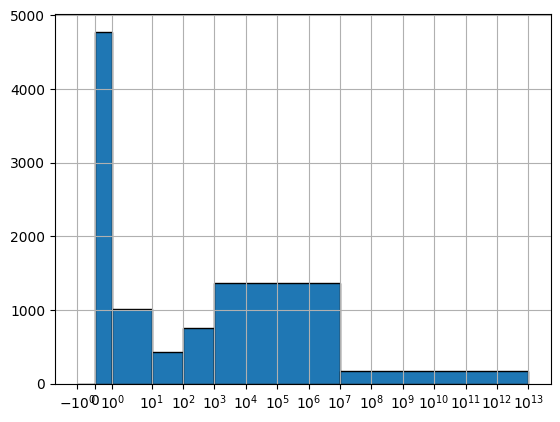

In [203]:
#create an histogram of column 12 excluding where the value is equal to 0
bins=[-1,0,1,10,100,1000,10000000,10000000000000]
print(df[columns[12]].value_counts().sum())
plt.xscale('symlog')
df[columns[12]].hist(bins=bins, align='mid',edgecolor='black')
#discretiza los valores de la columna en, los iguales a 0.01,0.1,1,10,100,1000,10000000,100000000
df[columns[12]] = pd.cut(df[columns[12]], bins=bins, labels=["CERO","MINIMO","UNO","DIEZ","CIEN","MIL","MUCHO"])
print(df[columns[12]].value_counts().sum())
print(df[columns[12]].value_counts())



Discretización 13ª columna: ERC20_total_ether_sent
SE PUEDEN QUITAR LOS QUE TENGAN MUCHOS VALORES = 0????

In [204]:
#estadistica de la columna 13
df[columns[13]].describe()
#count how many rows equal to 0
#print(df[columns[13]].value_counts())

count    8.518000e+03
mean     1.467013e+07
std      1.214135e+09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.120000e+11
Name: ERC20_total_ether_sent, dtype: float64

In [205]:
#CUANTOS VALORES IGUALES A 0 TIENEN EL VALOR FLAG COMO 1 Y CUANTOS COMO 0
print("FLAG",df[df[columns[13]]==0][columns[0]].value_counts())

FLAG 0    6011
1     947
Name: FLAG, dtype: int64


8518
CERO      6958
MIL        885
DIEZ       184
CIEN       177
MINIMO     164
MUCHO       89
UNO         61
Name: ERC20_total_ether_sent, dtype: int64
8518


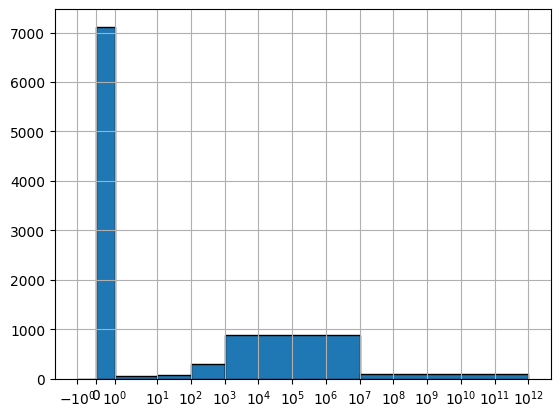

In [206]:
#create an histogram of column 13 
bins=[-1,0,1,10,100,1000,10000000,1000000000000]
print(df[columns[13]].value_counts().sum())
plt.xscale('symlog')
df[columns[13]].hist(bins=bins, align='mid',edgecolor='black')
#discretiza los valores de la columna en, los iguales a 0.01,0.1,1,10,100,1000,10000000,100000000
df[columns[13]] = pd.cut(df[columns[13]], bins=bins, labels=["CERO","MINIMO","UNO","DIEZ","CIEN","MIL","MUCHO"])
print(df[columns[13]].value_counts())
print(df[columns[13]].value_counts().sum())

Discretización 14ª columna: ERC20_total_Ether_sent_contract

In [207]:
#estadistica de la columna 14
df[columns[14]].describe()
#count how many rows equal to 0
#print(df[columns[14]].value_counts())

count      8518.000000
mean        117.373108
std        6303.805400
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      416000.000000
Name: ERC20_total_Ether_sent_contract, dtype: float64

In [208]:
#CUANTOS VALORES IGUALES A 0 TIENEN EL VALOR FLAG COMO 1 Y CUANTOS COMO 0
print("FLAG",df[df[columns[14]]==0][columns[0]].value_counts())

FLAG 0    7388
1    1102
Name: FLAG, dtype: int64


Discretización 15ª columna: ERC20_uniq_rec_token_name

In [209]:
#ESTADISTICA DE LA COLUMNA 15
df[columns[15]].describe()
#count how many rows equal to 0
print(df[columns[15]].value_counts())

0.0      4203
1.0      1221
2.0       925
4.0       285
3.0       281
         ... 
111.0       1
109.0       1
153.0       1
102.0       1
100.0       1
Name: ERC20_uniq_rec_token_name, Length: 121, dtype: int64


In [210]:
#CUANTOS VALORES IGUALES A 0 TIENEN EL VALOR FLAG COMO 1 Y CUANTOS COMO 0
print("Valor igual a 0")
print(df[df[columns[15]]==0][columns[0]].value_counts())
print("Valor distinto a 0")
print(df[df[columns[15]]!=0][columns[0]].value_counts())

Valor igual a 0
0    4183
1      20
Name: FLAG, dtype: int64
Valor distinto a 0
0    3229
1    1086
Name: FLAG, dtype: int64


<AxesSubplot:>

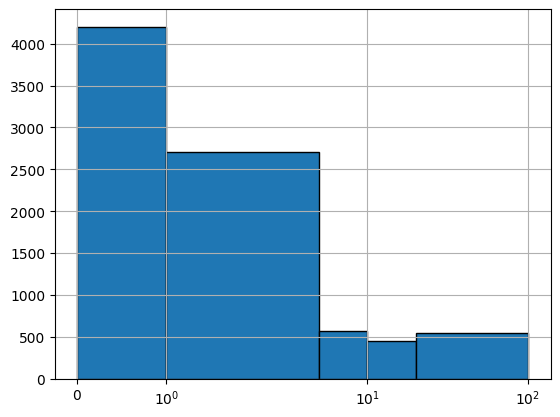

In [211]:
#crear histograma de la columna 15
bins=[0,0.99,5,10,20,101]
plt.xscale('symlog')
df[columns[15]].hist(bins=bins, align='mid',edgecolor='black')

Discretización 16ª columna: Total_unique_sent_to_addresses

In [212]:
#estadistica de la columna 16
df[columns[16]].describe()
#count how many rows equal to 0
print(df[columns[16]].value_counts())

1       2396
2       1398
0       1255
3       1226
4        300
        ... 
151        1
449        1
195        1
3268       1
280        1
Name: Total_unique_sent_to_addresses, Length: 295, dtype: int64


8518
8518
CERO     3651
UNO      1398
DOS      1226
DIEZ      998
CINCO     519
TRES      485
CIEN      241
Name: Total_unique_sent_to_addresses, dtype: int64


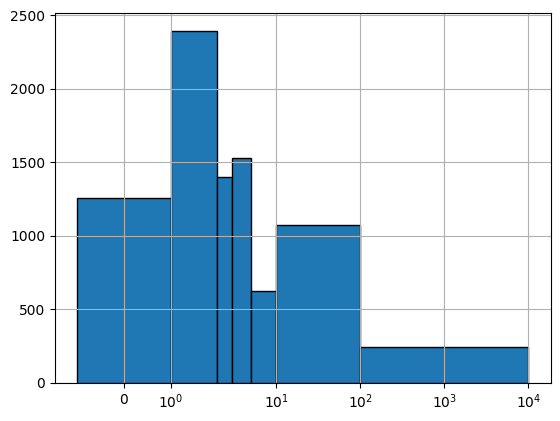

In [213]:
#histograma de la columna 16
print(df[columns[16]].value_counts().sum())
bins=[-1,1,2,3,5,10,100,10000]
plt.xscale('symlog')
df[columns[16]].hist(bins=bins, align='mid',edgecolor='black')
#discretiza los valores de la columna en, los iguales a 0,1,2,3,5,10,100,10000
df[columns[16]] = pd.cut(df[columns[16]], bins=bins, labels=["CERO","UNO","DOS","TRES","CINCO","DIEZ","CIEN"])
print(df[columns[16]].value_counts().sum())
print(df[columns[16]].value_counts())


Discretización 17ª columna: Total_unique_recieved

In [214]:
#estadistica de la columna 17
df[columns[17]].describe()
#count how many rows equal to 0
#print(df[columns[17]].value_counts())

count     8518.000000
mean        42.525241
std        338.245422
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max      10000.000000
Name: Total_unique_recieved, dtype: float64

8518
8518
TRES    2543
CERO    1749
UNO     1748
DIEZ    1619
DOS      580
CIEN     191
MIL       88
Name: Total_unique_recieved, dtype: int64


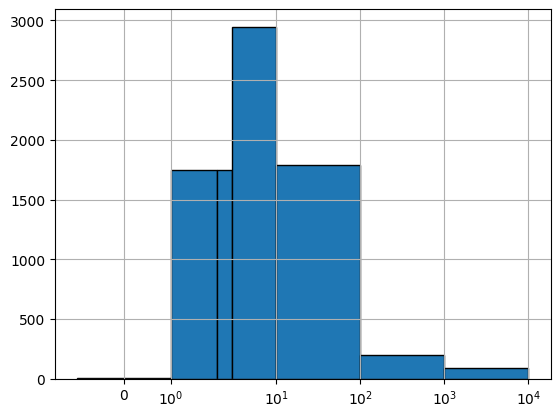

In [215]:
#crea un histograma de la columna 17
bins=[-1,1,2,3,10,100,1000,10001]
print(df[columns[17]].value_counts().sum())
plt.xscale('symlog')
df[columns[17]].hist(bins=bins, align='mid',edgecolor='black')
#discretiza los valores de la columna en, los iguales a 0,1,2,3,10,100,1000,100000
df[columns[17]] = pd.cut(df[columns[17]], bins=bins, labels=["CERO","UNO","DOS","TRES","DIEZ","CIEN","MIL"])
print(df[columns[17]].value_counts().sum())
print(df[columns[17]].value_counts())

DATA SET UP

In [216]:
for i in df.columns:
    print(f'La columna --{i}-- tiene --{len(df[i].value_counts())}-- valores únicos')
df.head()

La columna --FLAG-- tiene --2-- valores únicos
La columna --Avg_min_between_sent_tnx-- tiene --7-- valores únicos
La columna --Avg_min_between_received_tnx-- tiene --7-- valores únicos
La columna --Time_Diff_between_first_and_last_(Mins)-- tiene --8-- valores únicos
La columna --Sent_tnx-- tiene --8-- valores únicos
La columna --Received_Tnx-- tiene --8-- valores únicos
La columna --Number_of_Created_Contracts-- tiene --3-- valores únicos
La columna --max_value_received_-- tiene --7-- valores únicos
La columna --avg_val_received-- tiene --8-- valores únicos
La columna --avg_val_sent-- tiene --7-- valores únicos
La columna --total_Ether_sent-- tiene --7-- valores únicos
La columna --total_ether_balance-- tiene --11-- valores únicos
La columna --ERC20_total_Ether_received-- tiene --7-- valores únicos
La columna --ERC20_total_ether_sent-- tiene --7-- valores únicos
La columna --ERC20_total_Ether_sent_contract-- tiene --29-- valores únicos
La columna --ERC20_uniq_rec_token_name-- tiene --1

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,max_value_received_,avg_val_received,avg_val_sent,total_Ether_sent,total_ether_balance,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_rec_token_name,Total_unique_sent_to_addresses,Total_unique_recieved
0,0,NORMAL,ALTO,ALTISIMO,CIEN,CINCUENTA,CERO,DIEZ,CINCO,UNO,CIEN,MENOS CIEN,MUCHO,MUCHO,0.0,57.0,CIEN,DIEZ
1,0,MUY ALTO,ALTO,MUY ALTISIMO,CINCUENTA,CINCO,CERO,UNO,CERO,CERO,UNO,CERO,CIEN,UNO,0.0,7.0,DIEZ,TRES
2,0,ALTISIMO,ALTO,ALTISIMO,UNO,CINCO,CERO,UNO,CERO,UNO,UNO,UNO,CIEN,CERO,0.0,8.0,UNO,DIEZ
3,0,MUY ALTO,MUY ALTO,ALTISIMO,DIEZ,CINCO,CERO,CIEN,DIEZ,CINCUENTA,MIL,MENOS CIEN,MIL,MIL,0.0,11.0,DIEZ,DIEZ
4,0,POCO,MUY ALTO,ALTISIMO,MIL,DIEZ,MENOR A 20,DIEZ,UNO,CERO,CIEN,MENOS UNO,MIL,MIL,0.0,27.0,DIEZ,DIEZ


In [217]:
#check how many nan values are in the dataset
print(df.isna().sum())

FLAG                                       0
Avg_min_between_sent_tnx                   0
Avg_min_between_received_tnx               0
Time_Diff_between_first_and_last_(Mins)    0
Sent_tnx                                   0
Received_Tnx                               0
Number_of_Created_Contracts                0
max_value_received_                        0
avg_val_received                           0
avg_val_sent                               0
total_Ether_sent                           0
total_ether_balance                        0
ERC20_total_Ether_received                 0
ERC20_total_ether_sent                     0
ERC20_total_Ether_sent_contract            0
ERC20_uniq_rec_token_name                  0
Total_unique_sent_to_addresses             0
Total_unique_recieved                      0
dtype: int64


In [218]:
null = df[df.isna().any(axis=1)]
#for null.columns in null_columns:
#    print(column)
print(null.head(100))
#drop columns with names ERC20_total_Ether_sent_contract ERC20_uniq_rec_token_name
df.drop(columns=['ERC20_total_Ether_sent_contract','ERC20_uniq_rec_token_name'],inplace=True)

Empty DataFrame
Columns: [FLAG, Avg_min_between_sent_tnx, Avg_min_between_received_tnx, Time_Diff_between_first_and_last_(Mins), Sent_tnx, Received_Tnx, Number_of_Created_Contracts, max_value_received_, avg_val_received, avg_val_sent, total_Ether_sent, total_ether_balance, ERC20_total_Ether_received, ERC20_total_ether_sent, ERC20_total_Ether_sent_contract, ERC20_uniq_rec_token_name, Total_unique_sent_to_addresses, Total_unique_recieved]
Index: []


In [219]:
print(df.isna().sum())


FLAG                                       0
Avg_min_between_sent_tnx                   0
Avg_min_between_received_tnx               0
Time_Diff_between_first_and_last_(Mins)    0
Sent_tnx                                   0
Received_Tnx                               0
Number_of_Created_Contracts                0
max_value_received_                        0
avg_val_received                           0
avg_val_sent                               0
total_Ether_sent                           0
total_ether_balance                        0
ERC20_total_Ether_received                 0
ERC20_total_ether_sent                     0
Total_unique_sent_to_addresses             0
Total_unique_recieved                      0
dtype: int64


ONE HOT ENCODER

In [220]:
# select all columns except the first one
columns_to_encode = df.columns[1:]

# initialize the one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# fit the encoder on the selected columns
encoder.fit(df[columns_to_encode])

# encode the selected columns
encoded_columns = encoder.transform(df[columns_to_encode]).toarray()



# create a new dataframe with the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

# combine the original dataframe with the encoded dataframe
df = pd.concat([df.iloc[:, 0], encoded_df], axis=1)
# replace NaN values with zero
df.fillna(0, inplace=True)


In [221]:
#check how many nan values are in the dataset, and print all of them
print(df.isna().sum())
print(df[df.isna().any(axis=1)])

FLAG                                 0
Avg_min_between_sent_tnx_ALTISIMO    0
Avg_min_between_sent_tnx_ALTO        0
Avg_min_between_sent_tnx_CERO        0
Avg_min_between_sent_tnx_MUY ALTO    0
                                    ..
Total_unique_recieved_DIEZ           0
Total_unique_recieved_DOS            0
Total_unique_recieved_MIL            0
Total_unique_recieved_TRES           0
Total_unique_recieved_UNO            0
Length: 110, dtype: int64
Empty DataFrame
Columns: [FLAG, Avg_min_between_sent_tnx_ALTISIMO, Avg_min_between_sent_tnx_ALTO, Avg_min_between_sent_tnx_CERO, Avg_min_between_sent_tnx_MUY ALTO, Avg_min_between_sent_tnx_MUY POCO, Avg_min_between_sent_tnx_NORMAL, Avg_min_between_sent_tnx_POCO, Avg_min_between_received_tnx_ALTISIMO, Avg_min_between_received_tnx_ALTO, Avg_min_between_received_tnx_CERO, Avg_min_between_received_tnx_MINIMO, Avg_min_between_received_tnx_MUY ALTO, Avg_min_between_received_tnx_NORMAL, Avg_min_between_received_tnx_POCO, Time_Diff_between_first_a

In [222]:


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('FLAG', axis=1), df['FLAG'], test_size=0.2, random_state=42)

# Resample the training data to balance the classes, if necessary
# x_tr_resample, y_tr_resample = some_resampling_function(X_train, y_train)

# Normalize the data, if necessary
# norm_train_f, norm_test_f = some_normalization_function(X_train, X_test)

# Initialize KNN Classifier with 4 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the target variable for the test data
preds = knn.predict(X_test)

# Calculate the accuracy
score = roc_auc_score(y_test, preds)

# Print classification report and confusion matrix
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))
'''
# Plot ROC curve
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
'''


              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1614
         1.0       0.87      0.66      0.75       226

    accuracy                           0.95      1840
   macro avg       0.91      0.82      0.86      1840
weighted avg       0.94      0.95      0.94      1840

[[1591   23]
 [  76  150]]


"\n# Plot ROC curve\nfpr, tpr, threshold = roc_curve(y_test, preds)\nroc_auc = auc(fpr, tpr)\nplt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)\nplt.legend(loc = 'lower right')\nplt.plot([0, 1], [0, 1],'r--')\nplt.xlim([0, 1])\nplt.ylim([0, 1])\nplt.ylabel('True Positive Rate')\nplt.xlabel('False Positive Rate')\nplt.show()\n"

In [223]:
# Split data into training and testing sets
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

#print(X)
#print(X.shape, y.shape)

# Separar en train y test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#print(X_train.shape, y_train.shape)
#X_train.head()
#print(X_test.shape, y_test.shape)

In [224]:
'''
# Normalizacion 
norm = PowerTransformer()
norm_train_f = norm.fit_transform(X_train)
norm_df = pd.DataFrame(norm_train_f, columns=X_train.columns)
norm_df
'''
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {X_train.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(X_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')



Shape of the training before SMOTE: ((7357, 109), (7357,))
Shape of the training after SMOTE: ((12954, 109), (12954,))


MODELIZACION

In [225]:
def logisticregression(X_train, y_train, X_test, y_test):
    # Resample the training data to balance the classes, if necessary
    x_tr_resample, y_tr_resample = SMOTE(random_state=42).fit_resample(X_train, y_train)
    
    # Fit the logistic regression model to the resampled training data
    LR = LogisticRegression(random_state=42)
    LR.fit(x_tr_resample, y_tr_resample)
    
    # Transform the test features using the same scaler used for the training data
    norm_test_f = norm.transform(X_test)

    # Make predictions on the test data and calculate evaluation metrics
    preds = LR.predict(norm_test_f)
    print(y_test.shape)
    y_test.value_counts()

    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    score = roc_auc_score(y_test, preds)
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
logisticregression(X_train, y_train, X_test, y_test)


c:\Users\docam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


NameError: name 'norm' is not defined

In [ ]:
###KNN classifier
knn = KNeighborsClassifier(n_neighbors=4) # initialize the KNN classifier with 5 nearest neighbors
knn.fit(x_tr_resample, y_tr_resample) # fit the classifier to the training data

preds = knn.predict(norm_test_f) # predict the target variable for the test data
# calculate the accuracy
score = roc_auc_score(y_test, preds)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
"""
plt.figure(figsize=(6,4))
plt.title('ROC for tuned this Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("AUC score:  ", score )
"""

c:\Users\docam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1614
         1.0       0.72      0.75      0.73       226

    accuracy                           0.93      1840
   macro avg       0.84      0.85      0.85      1840
weighted avg       0.93      0.93      0.93      1840

[[1547   67]
 [  57  169]]


'\nplt.figure(figsize=(6,4))\nplt.title(\'ROC for tuned this Classifier\')\nplt.plot(fpr, tpr, \'b\', label = \'AUC = %0.2f\' % roc_auc)\nplt.legend(loc = \'lower right\')\nplt.plot([0,1], [0,1], \'r--\')\nplt.ylabel(\'True Positive Rate\')\nplt.xlabel(\'False Positive Rate\')\nplt.show()\n\nprint("AUC score:  ", score )\n'

RAMDOM FOREST CLASSIFIER

c:\Users\docam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      1614
         1.0       0.73      0.79      0.76       226

    accuracy                           0.94      1840
   macro avg       0.85      0.88      0.86      1840
weighted avg       0.94      0.94      0.94      1840

[[1547   67]
 [  47  179]]


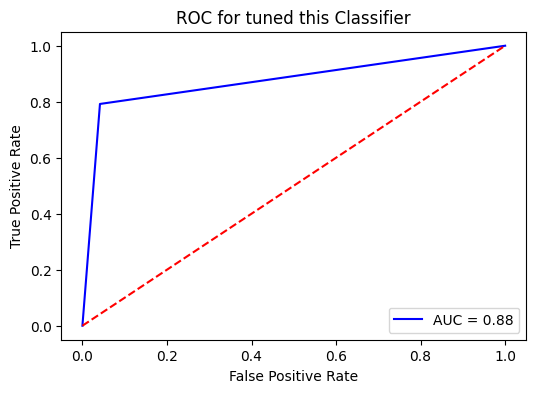

AUC score:   0.8752618131175225


In [ ]:
#Create a Random Forest Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_tr_resample,y_tr_resample)
preds=clf.predict(norm_test_f)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

score = roc_auc_score(y_test, preds)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.title('ROC for tuned this Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

score = roc_auc_score(y_test, preds)
print("AUC score:  ", score )

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1614
         1.0       0.88      0.65      0.75       226

    accuracy                           0.95      1840
   macro avg       0.92      0.82      0.86      1840
weighted avg       0.94      0.95      0.94      1840

[[1594   20]
 [  78  148]]


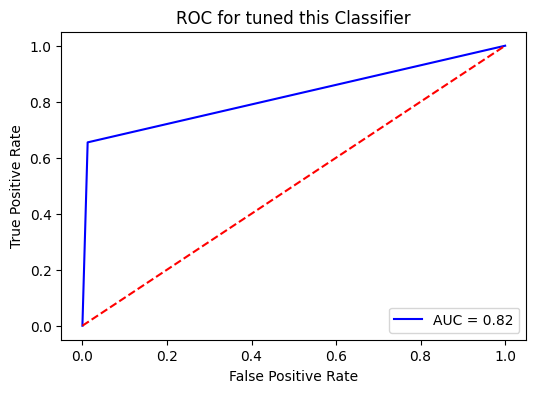

AUC score:  0.8212378414536523


In [ ]:
# Create a Random Forest Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)
# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

score = roc_auc_score(y_test, preds)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.title('ROC for tuned this Classifier')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

score = roc_auc_score(y_test, preds)
print("AUC score: ", score)


              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1614
         1.0       0.69      0.81      0.75       226

    accuracy                           0.93      1840
   macro avg       0.83      0.88      0.85      1840
weighted avg       0.94      0.93      0.93      1840

[[1534   80]
 [  44  182]]


c:\Users\docam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


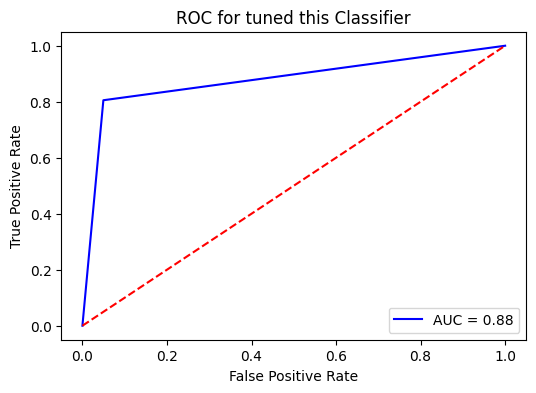

AUC score:   0.8778717197969099


In [ ]:
##Funcionan: GaussianNB,  BernoulliNB, No funcionan: CategoricalNB , ComplementNB,MultinomialNB
##Naive Bayes algorithm
nbayes = BernoulliNB()
nbayes.fit(x_tr_resample, y_tr_resample)
preds=nbayes.predict(norm_test_f)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.title('ROC for tuned this Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

score = roc_auc_score(y_test, preds)
print("AUC score:  ", score )

c:\Users\docam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1614
         1.0       0.00      0.00      0.00       226

    accuracy                           0.88      1840
   macro avg       0.44      0.50      0.47      1840
weighted avg       0.77      0.88      0.82      1840

[[1614    0]
 [ 226    0]]


c:\Users\docam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\docam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\docam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

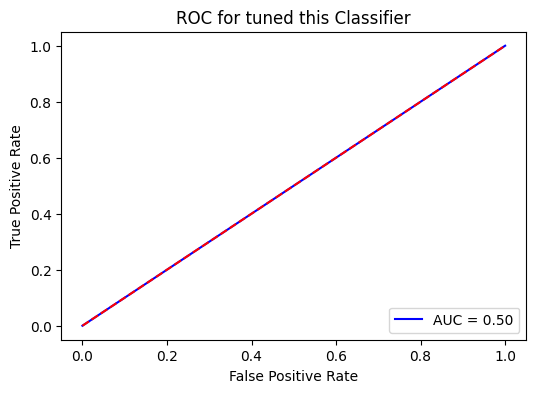

AUC score:   0.5


In [ ]:
##############FEAUTURE NAME?????????????????????????
suvm = svm.SVC(decision_function_shape='ovo')
suvm.fit(x_tr_resample, y_tr_resample)
preds=suvm.predict(norm_test_f)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

"""
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.title('ROC for tuned this Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

score = roc_auc_score(y_test, preds)
print("AUC score:  ", score )
"""

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1614
         1.0       0.69      0.73      0.71       226

    accuracy                           0.93      1840
   macro avg       0.82      0.84      0.83      1840
weighted avg       0.93      0.93      0.93      1840

[[1539   75]
 [  61  165]]


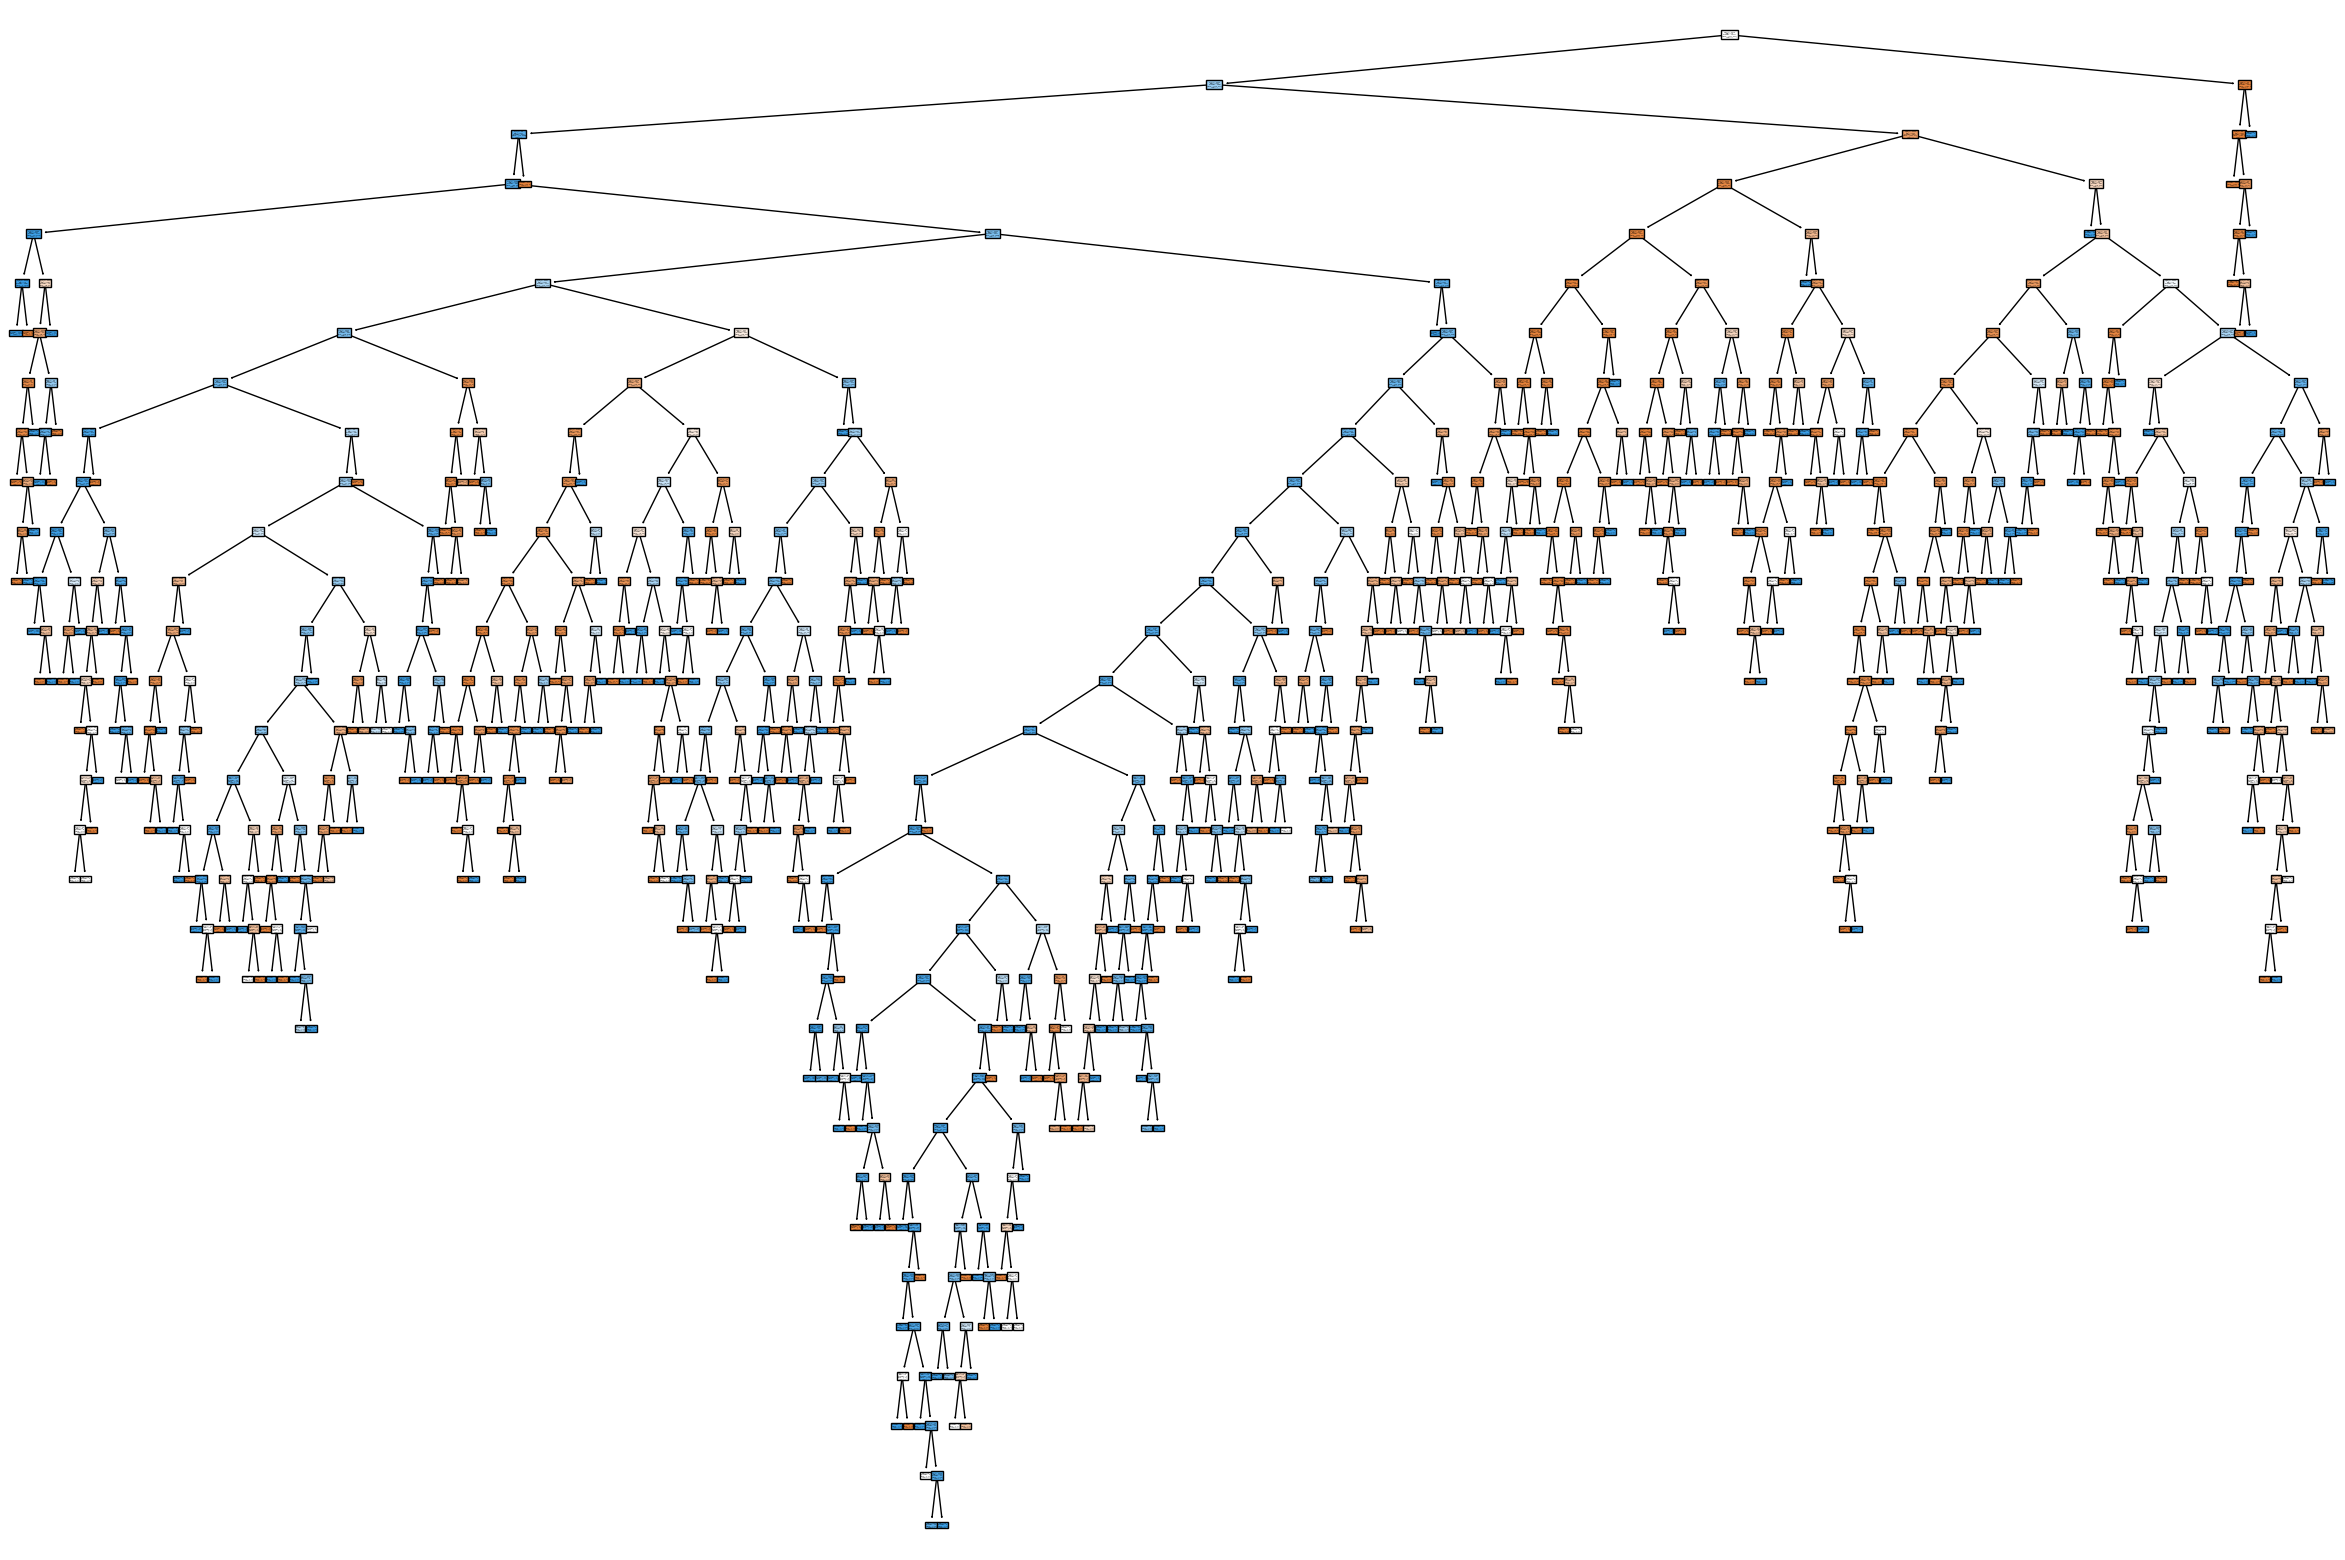

NameError: name 'dtreeviz' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:

# Crear un modelo de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el modelo con los datos de entrenamiento
clf.fit(x_tr_resample,y_tr_resample)

# Predecir las etiquetas para los datos de prueba
preds = clf.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

# Visualizar árbol de decisión
plt.figure(figsize=(30,20))
plot_tree(clf, class_names=['0','1'], filled=True)
plt.show()
# Guardar la figura como imagen JPEG de alta resolución
"""
plt.savefig('arbol_decision.jpg', dpi=300, bbox_inches='tight')
viz = dtreeviz(clf, X_train, y_train, class_names=['0', '1'])
viz.view()

plt.figure(figsize=(6, 4))
plt.title('ROC for tuned this Classifier')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

score = roc_auc_score(y_test, preds)
print("AUC score: ", score)
"""
